# Goal: Constrained Minimum Variance Frontier

## Background

The Minimum Variance Frontier can be calculated with certain constraints applied to the portfolios that compose it. Recall that the Minimum Variance Frontier comprises all minimum variance portfolios corresponding to various target expected portfolio returns, denoted as $\mu_i$.

The approach involves iterating through a range of desired portfolio expected returns and conducting a numerical optimization for each of these returns to identify the optimal constrained Minimum Variance Frontier.

In our example, we will apply two key constraints:

- A no-shorting constraint (MU: note, bound for optimizer), where $w_j \geq 0$ for each asset $j$.

- A diversification constraint (MU: note, bound for optimizer), where no more than $50\%$ of the total wealth is invested in any single asset $w_j \leq 0.5$ for each asset $j$.

## Getting Started

To tackle this optimization problem, we will primarily use numpy for handling the algebraic aspects. Additionally, we will utilize the scipy.optimize package, which offers a convenient and robust framework for numerical optimization. Lastly, we'll employ matplotlib to visually present our results. Let's dive in and explore how these constraints shape the efficient frontier.

## Settings: 
- 3 assets
- Expected returns: 0.03, 0.06, 0.08
- Standard deviation of returns: 0.04, 0.13, 0.16
- Correlation: 
    0.1 (1 and 2), 0.2 (1 and 3), 0.7 (2 and 3)
   


In [9]:
# Packages
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Investment Opportunity Set
mu = np.array([[0.03], [0.06], [0.08]])

Sigma = np.array([ [0.04**2, 0.1*0.04*0.13, 0.2*0.04*0.16 ], 
                   [0.1*0.04*0.13, 0.13**2, 0.7*0.13*0.16], 
                  [0.2*0.04*0.16, 0.7*0.13*0.16, 0.16**2] ])

In [11]:
#SINGLE OPTIMIZATIONS: Objective Function, Constraint Function, Starting Values, Bounds

def portfolio_variance(w):
        #input: w as numpy column vector
        #output: scalar
    return (w.T@Sigma@w).item() #objective function to be minimized


def eq_portfolio_return(w):
    #input: numpy portfolio column vector
    #note: mu_i is a global variable; needs to be known before calling this function
    #output: difference between w's expected return and the target return; scalar
    
    return (w.T@mu).item() - mu_i #constraint to meet target expected return mu_i


def eq_weight_sum(w): 
    #content: full investment constraint: 100% is invested in risky assets
    #input: numpy portfolio column vector
    #output: difference between sum of portfolio holdings and 100%=1. 
    
    return np.sum(w) - 1


# starting values
w0 = [0.3, 0.4, 0.3] # note: starting values matter for the local optimizer as it is not a global optimizer. hence, try to use informative starting values
#todo this is not an array, transposing in function above throws error

#=========PLAYING AROUND with Starting Values===============================================
#playing around: wrong w0 ==> awkward MV-frontier
##w0 = [1.3, 0.4, 0.3] #use a starting value that does not fullfil at least one constraint and chances rise you get stuck in "weired" local optima
##w0 = [0,0,0] # another example where "silly" starting value leads to "silly" constrained MV-F
#=========END PLAYING AROUND===============================================

#no short-sale (bound) and minimum diversification bound
bounds = [(0, 0.5), (0, 0.5), (0, 0.5)]

#======= PLAYING AROUND WITH BOUNDS TO SEE CONVERGENCE TO UNCONSTRAINED MV===
#for playing around: proxy for unconstrained
##bounds = [(-50, 50), (-50, 50), (-50, 50)]
#========= END PLAYING AROUND =====================


constraints = [{'type': 'eq', 'fun': eq_portfolio_return},
               {'type': 'eq', 'fun': eq_weight_sum}
               ] #target return and full investment constraint


    
    


In [12]:
#Loop through y-axis (i.e. mu_i)

mu_min = 0.02
mu_max = 0.2
incr = 0.001

In [13]:
#number of evaluations (i.e. number of optimizations)
nr_evals = int( (mu_max - mu_min) / incr + 1) #todo fehler 2
nr_evals #number of portfolios on the MV-frontier

181

In [14]:
# MV-Frontier

w_MV = np.zeros((nr_evals, 3))
mu_MV = np.zeros((nr_evals,))
sigma_MV = np.zeros((nr_evals,))

mu_i = mu_min
for i in range(0,nr_evals):
    w_opt = scipy.optimize.minimize(portfolio_variance, w0, bounds=bounds, constraints=constraints)
    w_MV[i,:] = w_opt.x
    mu_MV[i] = (w_opt.x.T@mu).item()  #MU: come back here.
    sigma_MV[i] = (w_opt.x.T@Sigma@w_opt.x).item()**0.5
    
    mu_i = mu_i + incr

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\leven\AppData\Local\Temp\ipykernel_1564\683690603.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(r)$')


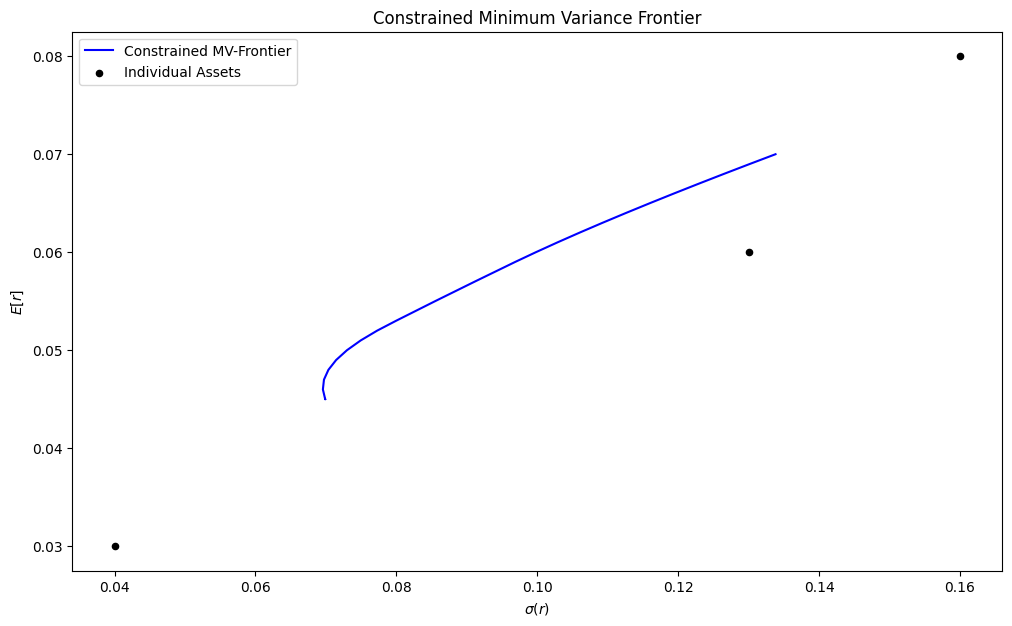

In [15]:
# Plot MV-Frontier

plt.figure(1, figsize=(12,7))

#show the MV-frontier that obeys constraints and bounds
plt.plot(sigma_MV, mu_MV, color='blue',label='Constrained MV-Frontier')

# add single assets investment opportunities
plt.scatter(np.diag(Sigma)**0.5, mu[:,0], s=20, color='black', label='Individual Assets')

#descrive axis
plt.xlabel('$\sigma(r)$')
plt.ylabel('$E[r]$')

plt.legend()

#add a title
plt.title('Constrained Minimum Variance Frontier')
plt.show()